In [1]:
import random
from citipy import citipy
import pandas as pd
import openweathermapy.core as ow
import numpy as np
import matplotlib.pyplot as plt

#your openweathermap api key goes here.
ow_api = "1ab3bf0029167b96f59e45a5e7d0b369"
#ow settings
settings = {"units": "imperial", "appid": ow_api}

In [2]:
#create a dataframe with a list of at least 500 random cities from citipy

citynames = []
citycountries = []

#set range to 1500 to trim down duplicate cities
for i in range(1500):
    randlat = random.uniform(-90, 90)
    randlong = random.uniform(-180, 180)
    city = citipy.nearest_city(randlat, randlong)
    citynames.append(city.city_name)
    citycountries.append(city.country_code)
    
city_df = pd.DataFrame({'City': citynames,
                  'Country': citycountries})

city_df.count()

City       1500
Country    1500
dtype: int64

In [3]:
#trim duplicates.
city_df = city_df.drop_duplicates(keep="first")
city_df.count()

City       602
Country    602
dtype: int64

In [4]:
#setting index and adding columns
city_df.set_index(['City', 'Country'])
city_df['City'] = city_df['City'].str.title()
city_df['Country'] = city_df['Country'].str.upper()
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Temperature'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Description'] = ''
city_df['Time Retrieved'] = ''
city_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Les Cayes,HT,,,,,,,,
1,Coquimbo,CL,,,,,,,,
2,Asilah,MA,,,,,,,,
3,Mahajanga,MG,,,,,,,,
4,Bengkulu,ID,,,,,,,,


In [5]:
#the big iterator.
#identifies the City Name in the dataframe, then finds it using the openweathermap wrapper.
#because not all cities are found with the wrapper, we will fill with NaN and then delete that row later

#saving some variables for the printed statements down below
counter = 0
totalcities = city_df['City'].count().sum()

#print(f"Retrieving OpenWeatherMaps weather data for {totalcities} random cities from citipy...")

#thanks to the NearestRestr and try/except exercises for this
for index, row in city_df.iterrows():

    cityloc = row['City'] + ',' + row['Country']
    
    try:
        data = ow.get_current(cityloc, **settings)
        row['Temperature'] = data('main.temp')
        row['Humidity'] = data('main.humidity')
        row['Cloudiness'] = data('clouds.all')
        row['Wind Speed'] = data('wind.speed')
        row['Latitude'] = data('coord.lat')
        row['Longitude'] = data('coord.lon')
        row['Description'] = data['weather'][0]['description']
        row['Time Retrieved'] = data('dt')
        #print(f"Retrieving Data at index {index} for: {row['City']},{row['Country']}; loading values...")
    except:
        row['Latitude'] = np.NaN
        counter += 1
        #print(f"Missing Data at index {index} for: {row['City']}, {row['Country']}; skipping...")

#print(f"There were {totalcities} randomly selected citipy cities, and {counter} were missing weather data on OpenWeatherMaps.")

In [6]:
#a look at the dataframe before dropping NaN values
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Les Cayes,HT,18.19,-73.75,84.18,91,12,18.25,few clouds,1529953468
1,Coquimbo,CL,-29.95,-71.34,55.4,76,0,13.87,clear sky,1529949600
2,Asilah,MA,35.47,-6.03,75.47,73,40,8.05,scattered clouds,1529951400
3,Mahajanga,MG,-15.72,46.32,73.4,73,20,4.7,few clouds,1529949600
4,Bengkulu,ID,NaN,,,,,,,
5,Mar Del Plata,AR,-46.43,-67.52,49.8,58,64,14,broken clouds,1529952966
6,Brenham,US,30.17,-96.4,88.47,49,40,12.75,scattered clouds,1529951700
7,Taolanaro,MG,NaN,,,,,,,
8,Cockburn Town,BS,24.03,-74.52,83.19,93,76,15.79,broken clouds,1529953473
9,Busselton,AU,-33.64,115.35,62.31,100,92,14.23,overcast clouds,1529952968


In [8]:
#delete all NaN values and return a final count of cities listed
city_df = city_df.dropna(axis=0, how="any")
finalcities = city_df['City'].count().sum()
#print(f"{finalcities + counter} cities were generated. {counter} cities will be dropped. {finalcities} random cities will be plotted.")

# statistically, this shouldn't filter to less than 500 cities. but i mean, if it ever did, well, i wouldn't know what to do.
if city_df['City'].count().sum() > 499:
    print("Success!")
else:
    print("NOTE: Less than 500 cities were filtered. I suggest running the script again from the start. Congrats on the statistical anomaly though!")

Success!


In [9]:
#convert the datetime to be readable; other formatting stuff, print final dataframe before plotting
city_df['Time Retrieved'] = pd.to_datetime(city_df['Time Retrieved'], unit='s')
city_df['Description'] = city_df['Description'].str.title()
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Les Cayes,HT,18.19,-73.75,84.18,91,12,18.25,Few Clouds,2018-06-25 19:04:28
1,Coquimbo,CL,-29.95,-71.34,55.4,76,0,13.87,Clear Sky,2018-06-25 18:00:00
2,Asilah,MA,35.47,-6.03,75.47,73,40,8.05,Scattered Clouds,2018-06-25 18:30:00
3,Mahajanga,MG,-15.72,46.32,73.4,73,20,4.7,Few Clouds,2018-06-25 18:00:00
5,Mar Del Plata,AR,-46.43,-67.52,49.8,58,64,14,Broken Clouds,2018-06-25 18:56:06
6,Brenham,US,30.17,-96.4,88.47,49,40,12.75,Scattered Clouds,2018-06-25 18:35:00
8,Cockburn Town,BS,24.03,-74.52,83.19,93,76,15.79,Broken Clouds,2018-06-25 19:04:33
9,Busselton,AU,-33.64,115.35,62.31,100,92,14.23,Overcast Clouds,2018-06-25 18:56:08
10,Bambanglipuro,ID,-7.95,110.28,72.48,91,92,3.94,Overcast Clouds,2018-06-25 19:04:33
11,Byron Bay,AU,-28.65,153.62,59,67,80,10.29,Broken Clouds,2018-06-25 18:00:00


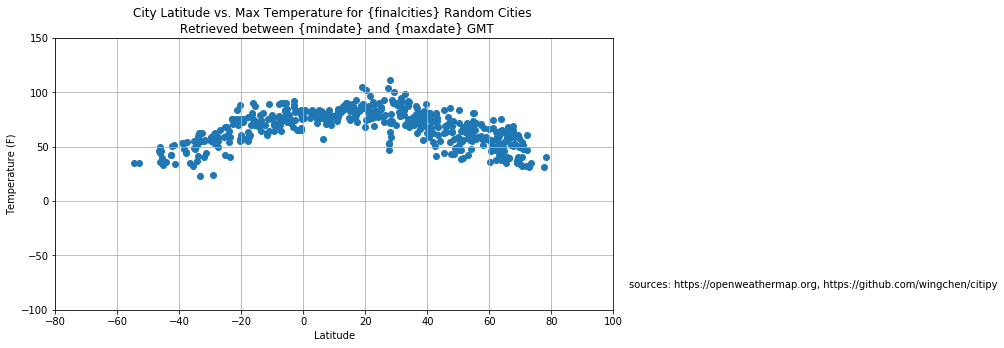

In [11]:
#time to set the time
mindate = city_df['Time Retrieved'].min()
maxdate = city_df['Time Retrieved'].max()

plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Temperature'], marker="o")
plt.title("City Latitude vs. Max Temperature for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -80, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-100, 150, 50)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

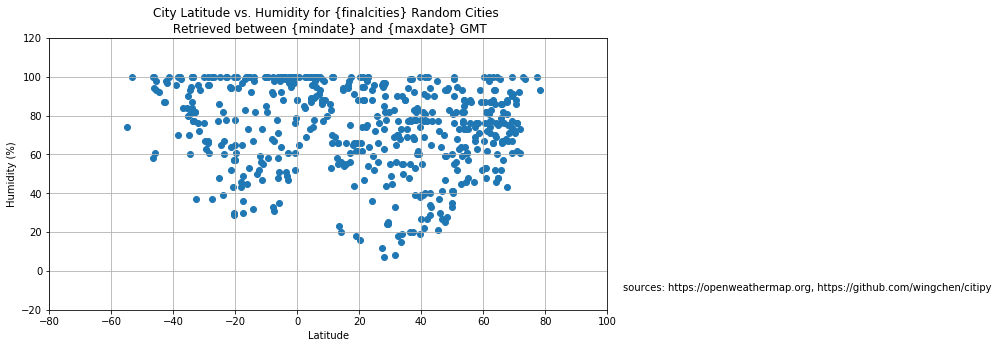

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o")
plt.title("City Latitude vs. Humidity for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -10, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-20, 120, 20)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

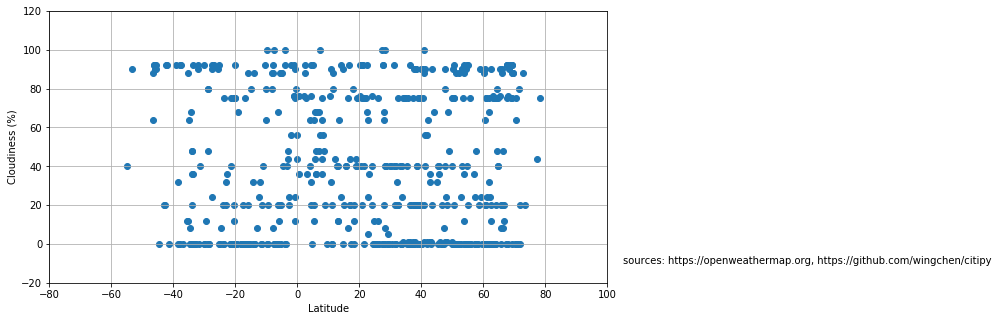

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o")
#plt.title(f"City Latitude vs. Cloudiness for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -10, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-20, 120, 20)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

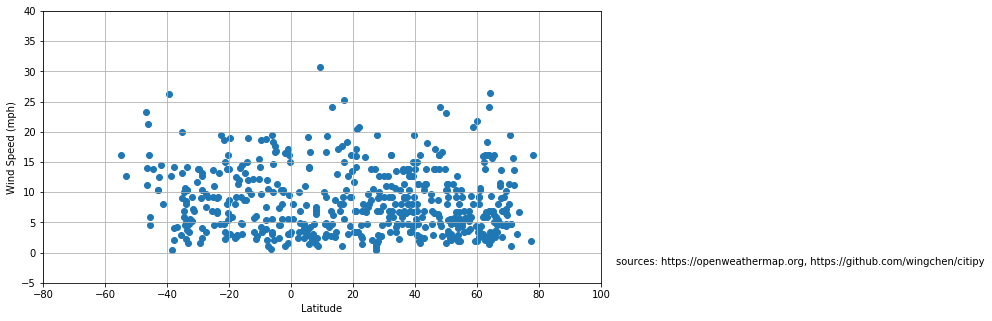

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o")
#plt.title(f"City Latitude vs. Wind Speed for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -2, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-5, 40, 5)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

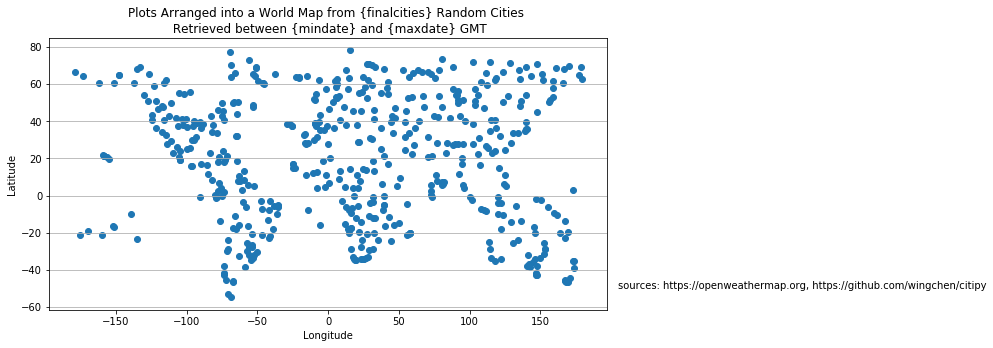

In [15]:
#cool it's a world map
plt.figure(figsize=(10,5))
plt.scatter(city_df['Longitude'], city_df['Latitude'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True, axis='y')
plt.title("Plots Arranged into a World Map from {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(205, -50, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.show()

In [ ]:
#TODO: add save to filepath here for final dataframe -> csv and plots -> png